# PyTorch Workflow

Let's explore an example PyTorch end-toend workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [48]:
what_we_are_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}
what_we_are_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [49]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data..)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation

To showcase this let's create some *known* data using the linear regression formula.

Note: slope is known as gradient as well!

We'll use linear regression formula to make a straight line with *known* **parameters**

In [50]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# X in machine learning is a matrix or a tensor, so X is capital
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [51]:
len(X), len(y)

(50, 50)

The whole point of supervised machine learning is learn a representation of the input and see how it maps to the output

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

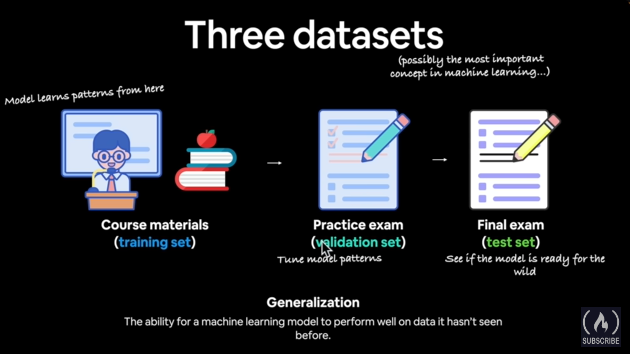

Lets create a training and test set with our data

In [52]:
# Create a train/test split:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # up until the train_split
X_test, y_test = X[train_split:], y[train_split:] # everything from train_split onwards

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Building a function to visualize our data

This is where the data explorer's motto comes in!
"Visualize, Visualize, Visualize!"

In [53]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [54]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

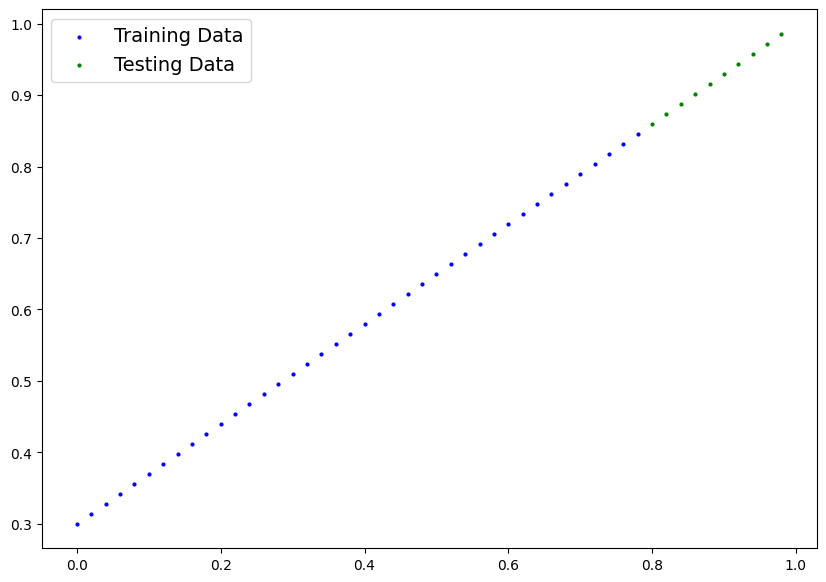

In [55]:
plot_predictions()

## 2. Build model

Our first PyTorch Model:

We will use classes, get familiar with OOP in Python, to do so, use the resourses available.

What our model does:
* start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through 2 main algorithms:
1. Gradient Descent
2. Back propagation

We use these two algorithms together.

According to Andrew, another was Normal Equation, which is only applicable in case of Linear Regression but not suitable for when the number of features are greater than 10000.

In [56]:
from torch import nn
# Create linear regression model class:
class LinearRegressionModel(nn.Module): # <- almost everything in Python inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent?
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float))

  # Forward method to define the computation in the model (if you inherit from nn.module you need to define the forward computation in your model)
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

# for now we have got a model that defines some forward computation


### PyTorch model building essentials:

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwirte forward(), this method defines what happens in the forward computation

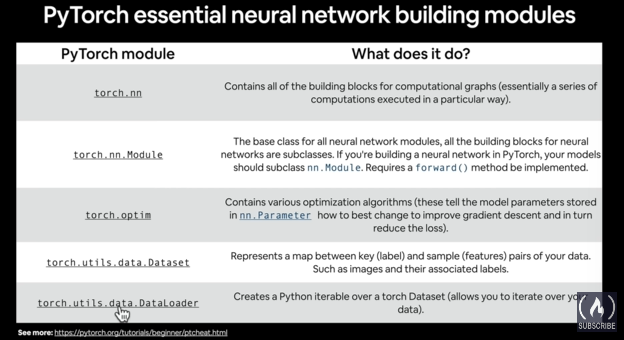

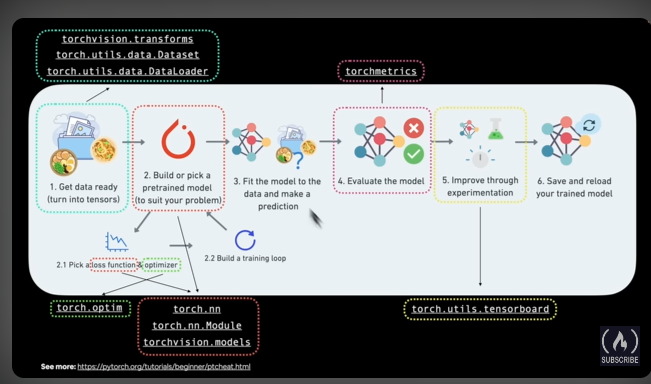
1. Get data ready:
torchvision.transforms
torch.utils.data.Dataset
torch.utils.data.DataLoader
2. Build or pick a pretrained model:
torch.nn
torch.nn.Module
torchvison.models
Optimizer: torch.optim
4. Evaluate:
torchmetrics
5. Improve through experimentation:
torch.utils.tensorboard

### Checking the contents of our PyTorch Model

Now we've created a model, lets see whats inside...

So we can check our model parameters or whats inside our model using `.parameters()`

In [57]:
# Create random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [58]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [59]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, lets see how well it predicts `y_test` for `x_test`

When we pass data to our model it's going to run it through the forward() method.

In [60]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [61]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

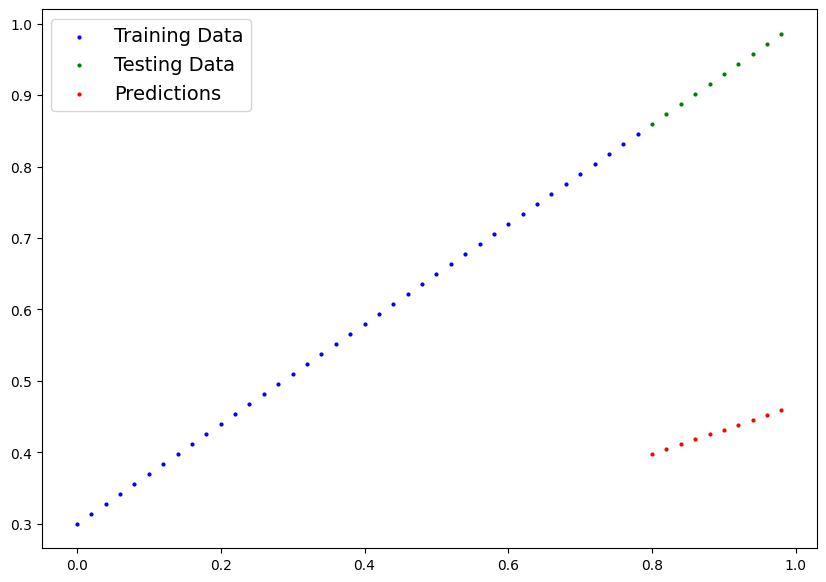

In [62]:
plot_predictions(predictions=y_preds)

Inference mode is a contex manager, that disables the useful things that are available during training,
so with a larger dataset, predictions will be a lot faster because a whole bunch of things are not being
saved to memory.
You could do the predictions directly but it would take more time:

In [63]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

Again you could use, torch.no_grad() as well, but still according to Daniel,
torch.inference_mode() is better

In [64]:
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

We will stick to torch.inference_mode()

In [65]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

### 3. Training model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some known parameters

or, in others words from a poor representation of the data to a better representation of the data

One way to measure how poorly our model is doing is to use a loss function!
There are quite a few loss functions in PyTorch.

* Note: It's also called a criterion or a cost function. It could also have other names!

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the models parameters (e.g. weight and bias in our case) to improve the loss function.
  * Inside the optimizer you will often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example; params=model_0.parameters()
    * `lr` = learning rate, which is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small lr results in small changes and a large lr results in large changes in the updated parameters). It determines the size of the step taken by the gradient descent algo in order to improve the cost function

And specifically for PyToch, we need:
* A training loop
* A testing loop


In [66]:
model_0.parameters()

<generator object Module.parameters at 0x7a7290a482e0>

In [67]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [68]:
# check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### 4. Setting up a Loss Function

In our case the mean absolute error, L1loss or the mean absolute error, MAEloss etc

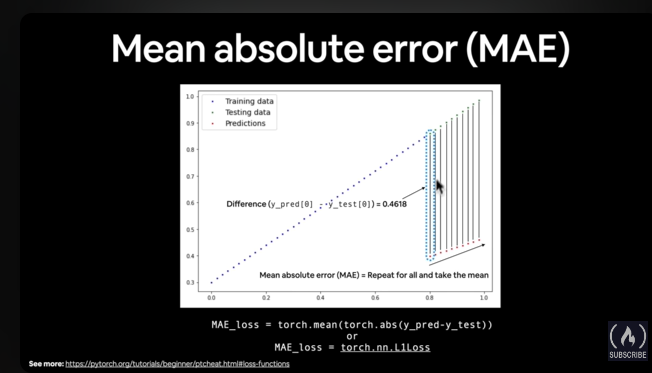

In [69]:
'''Loss function and optimizer go in tandem'''
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent is random gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate

In [70]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

Q: Which loss function and which optimizer should I use?

A: This will be problem specific.

For example, for a regression problem, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple things we need in a training loop:
0. Loop through the data and do:
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [71]:
model_0.parameters()

<generator object Module.parameters at 0x7a7290a48b30>

In [72]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

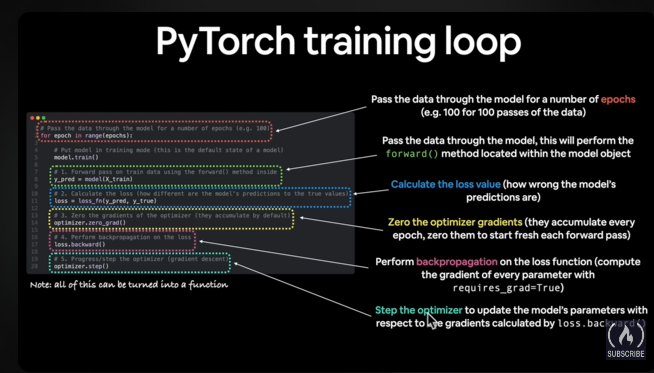

In [111]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
#One epoch is a single forward pass through the data
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass:
  y_pred = model_0(X_train)

  # 2. Calculate the loss:
  loss = loss_fn(y_pred, y_train) # compare prediction values with the true values of the target
  print(f'Loss: {loss}')

  # 3. Optimizer zero grad:
  optimizer.zero_grad() # the gradients that the optimizer calculates, accumulates. So you make it zero in this step.

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (Perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop, so we have to zero them above in step 3 of the loop


  ### Testing
  model_0.eval() # turns off gradient tracking

  # Print out model state_dict()
  print(model_0.state_dict())

Loss: 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])

In [91]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])

In [76]:
weight, bias

(0.7, 0.3)

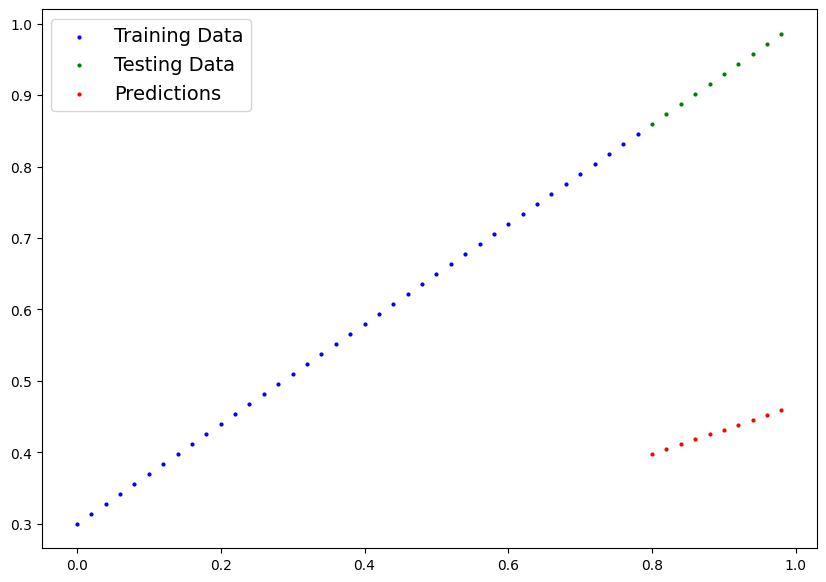

In [112]:
plot_predictions(predictions=y_preds)

In [113]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

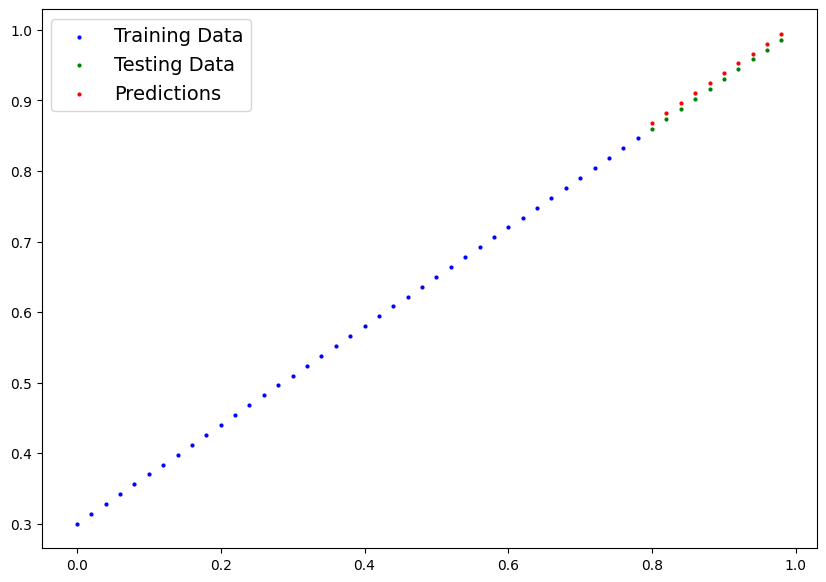

In [114]:
plot_predictions(predictions=y_preds_new)